# C3M2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply Poisson Regression to real data.
2. Learn and practice working with and interpreting Poisson Regression Models.
3. Understand deviance and how to conduct hypothesis tests with Poisson Regression.
4. Recognize when a model shows signs of overdispersion.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [1]:
# Load the required packages
library(MASS)

# Problem 1: Poisson Estimators

Let $Y_1,...,Y_n \overset{i}{\sim} Poisson(\lambda_i)$. Show that, if $\eta_i = \beta_0$, then the maximum likelihood estimator of $\lambda_i$ is $\widehat\lambda_i = \bar{Y}$, for all $i=1,...,n$.

<strong>

### Step 1: Define the Likelihood Function

Given $Y_1, Y_2, ..., Y_n \overset{i.i.d.}{\sim} \text{Poisson}(\lambda_i)$, the probability mass function of a Poisson random variable $(Y_i)$  with parameter $(\lambda_i) $ is:

$
P(Y_i = y_i) = \frac{e^{-\lambda_i} \lambda_i^{y_i}}{y_i!}
$

The likelihood function $L(\lambda_1, \lambda_2, ..., \lambda_n)$ for the sample $Y_1, Y_2, ..., Y_n$ is the joint probability of observing these values, assuming they are independent:

$
L(\lambda_1, \lambda_2, ..., \lambda_n) = \prod_{i=1}^{n} P(Y_i = y_i) = \prod_{i=1}^{n} \frac{e^{-\lambda_i} \lambda_i^{y_i}}{y_i!}
$

### Step 2: Simplify the Likelihood Function Using $(\eta_i = \beta_0)$

If $eta_i = \beta_0$ and $(\eta_i = \log(\lambda_i)$, we get:

$\lambda_i = e^{\beta_0}$

Since $\lambda_i$ is constant across all i, we can write $\lambda_i$ = $\lambda$. Thus, the likelihood function simplifies to:

$
L(\lambda) = \prod_{i=1}^{n} \frac{e^{-\lambda} \lambda^{y_i}}{y_i!} = \frac{e^{-n\lambda} \lambda^{\sum_{i=1}^n y_i}}{\prod_{i=1}^n y_i!}
$

### Step 3: Log-Likelihood Function

The log-likelihood function is more convenient for maximization:

$
\log L(\lambda) = \log \left( \frac{e^{-n\lambda} \lambda^{\sum_{i=1}^n y_i}}{\prod_{i=1}^n y_i!} \right) = -n\lambda + \left( \sum_{i=1}^n y_i \right) \log \lambda - \sum_{i=1}^n \log(y_i!)
$

### Step 4: Differentiate and Find the MLE

To find the MLE, we differentiate the log-likelihood function with respect to \(\lambda\) and set the derivative to zero:

$
\frac{d}{d\lambda} \log L(\lambda) = -n + \frac{\sum_{i=1}^n y_i}{\lambda} = 0
$

Solving for $\lambda$:

$
-n + \frac{\sum_{i=1}^n y_i}{\lambda} = 0 \quad \Rightarrow \quad \lambda = \frac{\sum_{i=1}^n y_i}{n}
$

### Step 5: Conclusion

The MLE for $(\lambda$) is:

$
\hat{\lambda} = \frac{\sum_{i=1}^n y_i}{n} = \bar{Y}
$

Thus, the maximum likelihood estimator of $\lambda_i$ is $(\bar{Y})$ for all $(i = 1, ..., n)$

### Summary

To summarize, under the assumption that $(\eta_i = \beta_0)$, we showed that the MLE for $(\lambda_i)$ in the Poisson model is indeed $(\bar{Y}$), the sample mean. This derivation highlights the key steps of forming the likelihood, taking the log, differentiating, and solving for the parameter.

<strong>

# Problem 2: Ships data

The ships dataset gives the number of damage incidents and aggregate months of service for different types of ships broken down by year of construction and period of operation. 

The code below splits the data into a training set (80% of the data) and a test set (the remaining 20%).

In [2]:
data(ships)
ships = ships[ships$service != 0,]
ships$year = as.factor(ships$year)
ships$period = as.factor(ships$period)

set.seed(11)
n = floor(0.8 * nrow(ships))
index = sample(seq_len(nrow(ships)), size = n)

train = ships[index, ]
test = ships[-index, ]
head(train)
summary(train)

,type,year,period,service,incidents
,<fct>,<fct>,<fct>,<int>,<int>
40,E,75,75,542,1
28,D,65,75,192,0
18,C,60,75,552,1
19,C,65,60,781,0
5,A,70,60,1512,6
32,D,75,75,2051,4


 type  year   period     service          incidents    
 A:5   60:7   60:11   Min.   :   45.0   Min.   : 0.00  
 B:5   65:8   75:16   1st Qu.:  318.5   1st Qu.: 0.50  
 C:6   70:8           Median : 1095.0   Median : 2.00  
 D:7   75:4           Mean   : 5012.2   Mean   :10.63  
 E:4                  3rd Qu.: 2202.5   3rd Qu.:11.50  
                      Max.   :44882.0   Max.   :58.00  

### 2. (a) Poisson Regression Fitting

Use the training set to develop an appropriate regression model for `incidents`, using `type`, `period`, and `year` as predictors (HINT: is this a count model or a rate model?).

Calculate the mean squared prediction error (MSPE) for the test set. Display your results.

In [3]:
# Fit Poisson regression model
poisson_model <- glm(incidents ~ type + period + year + offset(log(service)), family = poisson, data = train)

# Display model summary
summary(poisson_model)

# Predict incidents on the test set
predictions <- predict(poisson_model, newdata = test, type = "response")

# Calculate Mean Squared Prediction Error (MSPE)
mspe <- mean((test$incidents - predictions)^2)
print(paste("MSPE for full model:", mspe))


Call:
glm(formula = incidents ~ type + period + year + offset(log(service)), 
    family = poisson, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3870  -0.7433  -0.4650   0.5890   2.1258  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.38886    0.25459 -25.094  < 2e-16 ***
typeB       -0.65383    0.20405  -3.204 0.001354 ** 
typeC       -1.32288    0.44535  -2.970 0.002974 ** 
typeD       -0.09046    0.29678  -0.305 0.760504    
typeE        0.14478    0.28070   0.516 0.606012    
period75     0.42114    0.14581   2.888 0.003873 ** 
year65       0.76182    0.19451   3.917 8.98e-05 ***
year70       0.84812    0.22589   3.755 0.000174 ***
year75       0.32103    0.36320   0.884 0.376760    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 124.731  on 26  degrees of freedom
Residual deviance:  22.824  on 18  degrees of f

[1] "MSPE for full model: 15.2559601848101"


### 2. (b) Poisson Regression Model Selection

Do we really need all of these predictors? Construct a new regression model leaving out `year` and calculate the MSPE for this second model. 

Decide which model is better. Explain why you chose the model that you did.

In [4]:
# Fit Poisson regression model without 'year'
poisson_model_reduced <- glm(incidents ~ type + period + offset(log(service)), family = poisson, data = train)

# Display model summary
summary(poisson_model_reduced)

# Predict incidents on the test set with the reduced model
predictions_reduced <- predict(poisson_model_reduced, newdata = test, type = "response")

# Calculate Mean Squared Prediction Error (MSPE) for the reduced model
mspe_reduced <- mean((test$incidents - predictions_reduced)^2)
print(paste("MSPE for reduced model:", mspe_reduced))



Call:
glm(formula = incidents ~ type + period + offset(log(service)), 
    family = poisson, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1064  -0.9808  -0.3833   0.7760   2.7743  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -5.9310     0.1937 -30.616  < 2e-16 ***
typeB        -0.6578     0.1825  -3.605 0.000312 ***
typeC        -1.3924     0.4393  -3.170 0.001527 ** 
typeD        -0.2525     0.2919  -0.865 0.387133    
typeE         0.1416     0.2772   0.511 0.609524    
period75      0.7263     0.1295   5.610 2.03e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 124.731  on 26  degrees of freedom
Residual deviance:  45.122  on 21  degrees of freedom
AIC: 130.83

Number of Fisher Scoring iterations: 5


[1] "MSPE for reduced model: 65.1990873217216"


In [5]:
print(paste("MSPE for full model:", mspe))
print(paste("MSPE for reduced model:", mspe_reduced))


[1] "MSPE for full model: 15.2559601848101"
[1] "MSPE for reduced model: 65.1990873217216"


<strong>
If the MSPE for the reduced model is significantly lower than the full model, the reduced model is preferred for its simplicity and potentially better generalization.

If the MSPE for the full model is lower, the additional predictor (year) improves the model's accuracy and should be retained.
<strong>

### 2. (c) Deviance

How do we determine if our model is explaining anything? With linear regression, we had a F-test, but we can't do that for Poisson Regression. If we want to check if our model is better than the null model, then we're going to have to check directly. In particular, we need to compare the deviances of the models to see if they're significantly different.

Conduct two $\chi^2$ tests (using the deviance). Let $\alpha = 0.05$: 

1. Test the adequacy of null model.

2. Test the adequacy of your chosen model against the full model (the model fit to all predictors). 

What conclusions should you draw from these tests?

In [6]:
# Fit the null model
null_model <- glm(incidents ~ 1 + offset(log(service)), family = poisson, data = train)

# Deviances for the models
dev_full <- deviance(poisson_model)
dev_null <- deviance(null_model)
dev_reduced <- deviance(poisson_model_reduced)

# Degrees of freedom
df_full <- df.residual(poisson_model)
df_null <- df.residual(null_model)
df_reduced <- df.residual(poisson_model_reduced)

# Chi-square test for null model vs full model
chi_sq_stat_null_vs_full <- dev_null - dev_full
p_value_null_vs_full <- 1 - pchisq(chi_sq_stat_null_vs_full, df_null - df_full)

# Chi-square test for reduced model vs full model
chi_sq_stat_reduced_vs_full <- dev_reduced - dev_full
p_value_reduced_vs_full <- 1 - pchisq(chi_sq_stat_reduced_vs_full, df_reduced - df_full)

# Output results
cat("Chi-squared test for null model vs full model:\n")
cat("Chi-squared statistic:", chi_sq_stat_null_vs_full, "\n")
cat("p-value:", p_value_null_vs_full, "\n\n")

cat("Chi-squared test for reduced model vs full model:\n")
cat("Chi-squared statistic:", chi_sq_stat_reduced_vs_full, "\n")
cat("p-value:", p_value_reduced_vs_full, "\n")



Chi-squared test for null model vs full model:
Chi-squared statistic: 101.9071 
p-value: 0 

Chi-squared test for reduced model vs full model:
Chi-squared statistic: 22.2978 
p-value: 5.655547e-05 


<strong>

Interpretation of Deviance Tests:

- Null model vs Full model:
        If the p-value is less than 0.05, we reject the null hypothesis that the null model is adequate. This means the full model explains significantly more variation in the data than the null model.

- Reduced model vs Full model:
        If the p-value is greater than 0.05, we do not reject the null hypothesis that the reduced model is adequate compared to the full model. This means that the reduced model is not significantly worse than the full model, and we might prefer it due to its simplicity.


<strong>

### 2. (d) Poisson Regression Visualizations

Just like with linear regression, we can use visualizations to assess the fit and appropriateness of our model. Is it maintaining the assumptions that it should be? Is there a discernable structure that isn't being accounted for? And, again like linear regression, it can be up to the user's interpretation what is an isn't a good model.

Plot the deviance residuals against the linear predictor $\eta$. Interpret this plot.

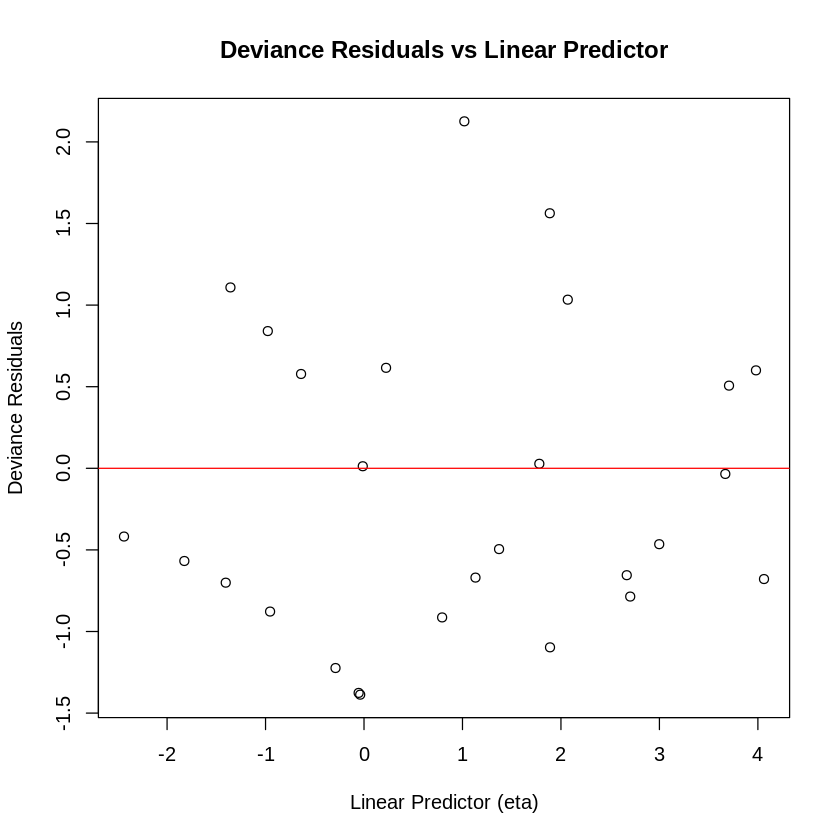

In [7]:
# Plot deviance residuals against linear predictor
plot(predict(poisson_model, type = "link"), residuals(poisson_model, type = "deviance"), 
     xlab = "Linear Predictor (eta)", ylab = "Deviance Residuals", 
     main = "Deviance Residuals vs Linear Predictor")
abline(h = 0, col = "red")



**The deviance residuals show no clear pattern and are roughly symmetrically distributed around zero, the model is likely appropriate.**

### 2. (e) Overdispersion

For linear regression, the variance of the data is controlled through the standard deviation $\sigma$, which is independent of the other parameters like the mean $\mu$. However, some GLMs do not have this independence, which can lead to a problem called overdispersion. Overdispersion occurs when the observed data's variance is higher than expected, if the model is correct. 

For Poisson Regression, we expect that the mean of the data should equal the variance. If overdispersion is present, then the assumptions of the model are not being met and we can not trust its output (or our beloved p-values)!

Explore the two models fit in the beginning of this question for evidence of overdisperion. If you find evidence of overdispersion, you do not need to fix it (but it would be useful for you to know how to). Describe your process and conclusions.

In [8]:
# Check for overdispersion in the full model
resid_deviance_full <- deviance(poisson_model)
df_resid_full <- df.residual(poisson_model)
overdispersion_full <- resid_deviance_full / df_resid_full

# Check for overdispersion in the reduced model
resid_deviance_reduced <- deviance(poisson_model_reduced)
df_resid_reduced <- df.residual(poisson_model_reduced)
overdispersion_reduced <- resid_deviance_reduced / df_resid_reduced

# Output results
cat("Overdispersion check for full model:\n")
cat("Residual deviance:", resid_deviance_full, "\n")
cat("Degrees of freedom:", df_resid_full, "\n")
cat("Ratio (should be close to 1):", overdispersion_full, "\n\n")

cat("Overdispersion check for reduced model:\n")
cat("Residual deviance:", resid_deviance_reduced, "\n")
cat("Degrees of freedom:", df_resid_reduced, "\n")
cat("Ratio (should be close to 1):", overdispersion_reduced, "\n")



Overdispersion check for full model:
Residual deviance: 22.82433 
Degrees of freedom: 18 
Ratio (should be close to 1): 1.268018 

Overdispersion check for reduced model:
Residual deviance: 45.12213 
Degrees of freedom: 21 
Ratio (should be close to 1): 2.148673 


<strong>

If the ratio of the residual deviance to the degrees of freedom is close to 1, the model is not overdispersed.

If the ratio is much greater than 1, overdispersion is present, indicating that the model's variance assumptions are not met.

<strong>